In [ ]:
# # 1. Load 'morse.csv'
import pandas as pd
morse_code = pd.read_csv('/content/hindi_moyemoye_csv.csv', header=None, names=['letter', 'code'], index_col='letter',encoding='UTF-8')
morse_code

,code
letter,
ा,.-
ि,-..
ु,..-
े,..-.
ो,---
...,...
त्र्,.. --.-
श्र्,.. -..-
हूँ,.. ----


/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 2360 (\N{DEVANAGARI LETTER SA}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Matplotlib currently does not support Devanagari natively.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 2366 (\N{DEVANAGARI VOWEL SIGN AA}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 2361 (\N{DEVANAGARI LETTER HA}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 2357 (\N{DEVANAGARI LETTER VA}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 2350 (\N{DEVANAGARI LETTER MA}) missing from current font.
  func(*args

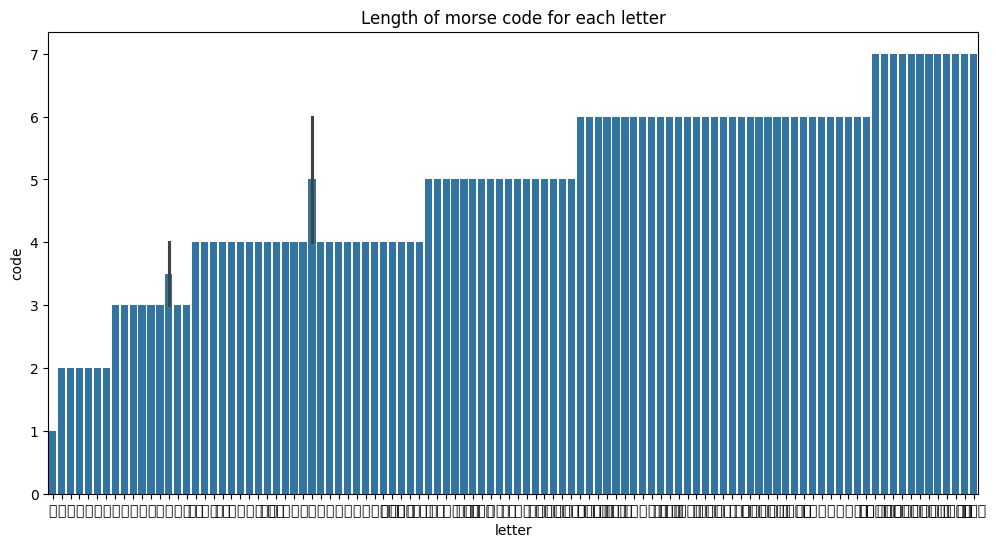

In [ ]:
# 2. Barplot showing the length of morse encoding for each letter
import matplotlib.pyplot as plt
import seaborn as sns
morse_length = morse_code['code'].str.len()
sorted = morse_length.sort_values().to_frame().reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(sorted, x='letter', y='code').set_title('Length of morse code for each letter');

In [ ]:
# 3. Load Brown text corpus
with open('/content/hi_dedup_1000.txt') as bfile:
    btext = bfile.read()

In [ ]:
# drop all non-letter symbols
import re
btext = re.sub('[^ऀ-ॿ]+', '', btext)
btext[:30]


'शारदापाराकेमिलनचैकसेआजमहापौरदे'

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 2366 (\N{DEVANAGARI VOWEL SIGN AA}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Matplotlib currently does not support Devanagari natively.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 2352 (\N{DEVANAGARI LETTER RA}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 2325 (\N{DEVANAGARI LETTER KA}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 2375 (\N{DEVANAGARI VOWEL SIGN E}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 2381 (\N{DEVANAGARI SIGN VIRAMA}) missing from current font.
  func(

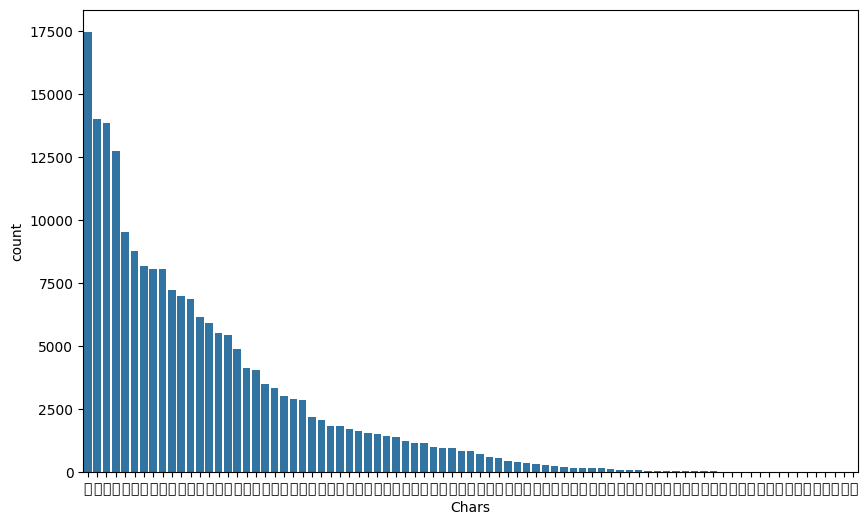

In [ ]:
# 4. Barplot showing the frequency of each letter
brown_text = pd.DataFrame({'Chars': [char for char in btext]})
brown_text = brown_text.value_counts().to_frame().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(data=brown_text, x="Chars", y="count");

For single letter without diacritics

In [ ]:
# import pandas as pd

# # Load 'Morse code Hindi.csv' into DataFrame
# morse_code = pd.read_csv('/content/hindi_moyemoye_csv.csv', header=None, names=['letter', 'code'], index_col='letter')

# def encrypt(message, morse_code):
#     encrypted_message = []
#     for char in message:
#         if char in morse_code.index:
#             encrypted_message.append(morse_code.loc[char, 'code'])
#             encrypted_message.append('/')
#         elif char == ' ':
#             encrypted_message.append('//')
#     return ''.join(encrypted_message)


# # Function to decrypt Morse code back to message
# def decrypt(encrypted_message, morse_code):
#     morse_to_char = {code: char for char, code in morse_code['code'].to_dict().items()}
#     decrypted_message = []
#     words = encrypted_message.split('//')
#     for word in words:
#         letters = word.split('/')
#         for letter in letters:
#             if letter in morse_to_char:
#                 decrypted_message.append(morse_to_char[letter])
#         decrypted_message.append(' ')
#     return ''.join(decrypted_message)

# # Testing the encryption and decryption functions
# with open("/content/Hindi Message.txt", "r") as file:
#     original_message = file.read()

# # Encrypt the message using Morse code mappings
# encrypted_message = encrypt(original_message, morse_code)

# # Print the encrypted message
# print("Encrypted message:", encrypted_message)

# # Compare original message with decrypted message
# print(f'Original message: {original_message[:15]}')
# print(f'Decrypted message: {decrypted_message[:15]}')
# print(f'Do messages match? {original_message == decrypted_message}')


In [ ]:
import pandas as pd
import unicodedata

# Load 'Morse code Hindi.csv' into DataFrame
morse_code = pd.read_csv('/content/hindi_moyemoye_csv.csv', header=None, names=['letter', 'code'], index_col='letter')

def preprocess_text(text):
    # Normalize text to decomposed Unicode form
    normalized_text = unicodedata.normalize('NFD', text)
    # Filter out combining characters (matras)
    filtered_text = ''.join(char for char in normalized_text if unicodedata.category(char) != 'Mn')
    return filtered_text

def encrypt(message, morse_code):
    encrypted_message = []
    words = preprocess_text(message).split()  # Split the normalized message into words
    for word in words:
        for char in word:
            if char in morse_code.index:
                # Encode base character
                encrypted_message.append(morse_code.loc[char, 'code'])
                encrypted_message.append('/')
            elif char == ' ':
                encrypted_message.append('//')  # Double slash for space
            else:
                # Handle characters not found in the DataFrame
                print(f"Unrecognized character: {char}")
        encrypted_message.append('//')  # Separate words with double slash
    return ''.join(encrypted_message)

# Testing the encryption function
with open("/content/Hindi Message.txt", "r") as file:
    original_message = file.read()

# Encrypt the message using Morse code mappings
encrypted_message = encrypt(original_message, morse_code)

# Print the encrypted message
print("Encrypted message:", encrypted_message)


Encrypted message: --/.-./.-///-./.-/--///- .-/.-./. --///….///


In [ ]:
def decrypt(encrypted_message, morse_code):
    morse_to_char = {code: char for char, code in morse_code['code'].to_dict().items()}
    decrypted_message = []
    words = encrypted_message.split('//')  # Split the encrypted message into words
    for word in words:
        letters = word.split('/')
        for letter in letters:
            if letter in morse_to_char:
                decrypted_message.append(morse_to_char[letter])
            elif letter == '':
                decrypted_message.append(' ')  # Handle double slashes as space
        decrypted_message.append(' ')  # Separate words with space
    return ''.join(decrypted_message)

# Decrypt the encrypted message
decrypted_message = decrypt(encrypted_message.replace('letter', '्'), morse_code)

# Print the decrypted message
print("Decrypted message:", decrypted_message)


Decrypted message: मरा  नाम  अरण  ह    


In [ ]:
# Compare original message with decrypted message
print(f'Original message: {original_message[:15]}')
print(f'Decrypted message: {decrypted_message[:15]}')
print(f'Do messages match? {original_message == decrypted_message}')

Original message: मेरा नाम अरुण ह
Decrypted message: मरा  नाम  अरण  
Do messages match? False
